In [19]:
import tensorflow as tf

In [20]:
#Load the mnist dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 408s 36us/step


In [21]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [22]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.28473896, -0.86006105, -0.616012  , -0.25001922,  0.03969756,
        -0.2527063 , -0.39668941,  0.45538503, -0.4716849 , -0.4802595 ]],
      dtype=float32)

In [23]:
tf.nn.softmax(predictions).numpy()

array([[0.09639629, 0.05422519, 0.06921341, 0.09980191, 0.13334025,
        0.0995341 , 0.08618682, 0.20206545, 0.07995962, 0.07927693]],
      dtype=float32)

In [24]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [25]:
loss_fn(y_train[:1], predictions).numpy()

2.307255

In [28]:
x_train[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [33]:
images = np.reshape(x_train[:1], (28, 28))

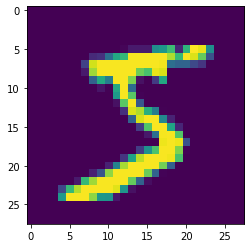

In [34]:
plt.imshow(images)

In [39]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [40]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.9129: 0s - loss: 0
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1466 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1097 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0912 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9767


In [41]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0730 - accuracy: 0.9772


[0.07302520424127579, 0.9771999716758728]

In [42]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [43]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.98401340e-07, 2.84806617e-07, 1.01239475e-05, 3.86133383e-04,
        2.95158537e-10, 9.80490313e-07, 4.54434147e-12, 9.99580085e-01,
        7.02170064e-06, 1.50326223e-05],
       [4.59979134e-07, 1.33525728e-05, 9.99961972e-01, 1.78482412e-06,
        9.25042988e-16, 2.23194202e-05, 8.20384258e-08, 5.01030153e-15,
        5.67576812e-08, 6.80021428e-15],
       [6.50291611e-07, 9.99047577e-01, 2.27766388e-04, 1.46694874e-05,
        3.96191026e-05, 2.21172522e-05, 5.46279225e-05, 3.82135302e-04,
        2.10111175e-04, 7.52980043e-07],
       [9.99939680e-01, 3.78517946e-08, 4.76390014e-05, 7.60126824e-08,
        6.22324450e-08, 3.27344537e-06, 7.82080133e-06, 5.65773519e-07,
        7.47713980e-09, 6.65933669e-07],
       [2.04989135e-07, 8.54826254e-09, 1.23402344e-06, 2.59024144e-08,
        9.95531261e-01, 9.60827009e-08, 7.45214902e-06, 9.99248368e-05,
        1.15201692e-06, 4.35864739e-03]], dtype=float32)>